## Experiment 3

In this experiment we will use the model we obatined from experiment 1 to try to make successive predictions.

I do not expect to see very good results as the error propagates, hence making the prediction deviate further and further from the ground truth.

One interesting thing to analyse is to see how long we can predict without having too big an error. This is similar to what we did in experiment 2.

In [15]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# import functions
import sys
sys.path.insert(0, '../')
from my_functions import *

## Read data

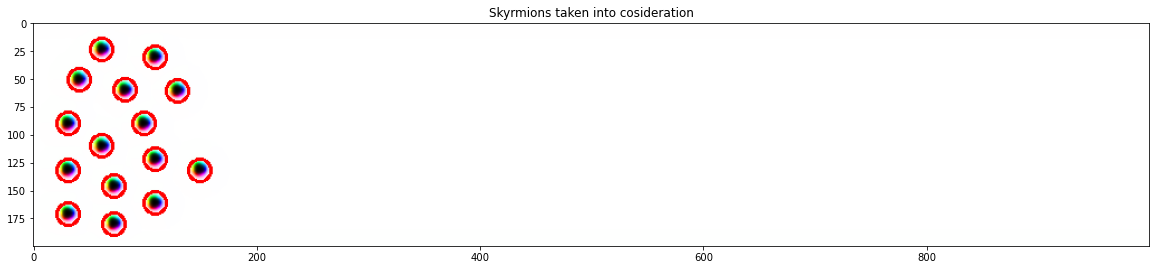

Getting frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:06<00:00, 122.58it/s]


In [2]:
data = pd.read_csv('../../data/processed/trajectories.csv')

# show which particles we will be working on
show_tracked(data, '../../data/raw/')

# get list of frames, each item in the list is another list containing the x, y coordinates
# for each skyrmion in order, i.e. [x_0, y_0, x_1, y_1, ...]
frames = get_frames(data)

In [11]:
def preprocess(frames, k=1):
    # data in columns format (frame, next frame, next next frame, ...)
    df = pd.DataFrame(columns=['X', 'y_1'])

    for i in range(1, k):
        df['y_' + str(i+1)] = ''

    for i in range(k+1):
        col = []
        for j in range(i, len(frames)-k+i):
            col.append(frames[j])
        if i == 0:
            df['X'] = col
        else:
            df['y_' + str(i)] = col
    
    return df

In [40]:
def get_succ_pred():
    y_i_predict =  lin_model.predict(X_train+X_test)

    for i in range(1, k):
        print("The model performance for y_{} -> y_{}".format(i, i+1))
        y_i_predict = evaluate(y_i_predict, df['y_' + str(i+1)].tolist(), lin_model)

In [42]:
def plot(model, j = 0, ids = [0]):
    # get predictions from j to j+n
    # j needs to be such that j+n < total number of frames
    # these are the n frames starting from frame j to j+n (ground truth)
    truth = df.iloc[j].values.tolist()

    predictions = []
    predictions.append((X_train+X_test)[j])

    y_i_predict = model.predict(X_train+X_test)
    predictions.append(y_i_predict[j].tolist())

    for i in range(1, k):
        y_i_predict = lin_model.predict(y_i_predict)
        predictions.append(y_i_predict[j].tolist())
        
    pred_df = get_predictions_df(predictions)
    
    plot_prediction(data[(data['frame'] >= j) & (data['frame'] <= j+k)],
                    pred_df[pred_df['frame'] > 0], pred_df[pred_df['frame'] == 0], ids=ids)

## Try one value of k and plot

In [66]:
k = 10
df = preprocess(frames, k)

In [67]:
X_train, y_train, X_test, y_test = split(df, 0.2)

In [68]:
# load model from experiment 1
filename = '../../models/regression_1_linear.sav'
model = pickle.load(open(filename, 'rb'))

# check performance on train and test set
print('The model performance for X_train')
y_predict_train = evaluate(X_train, y_train, model)

print('The model performance for X_test')
y_predict_test = evaluate(X_test, y_test, model)

The model performance for X_train
--------------------------------------
RMSE is 3.4173015901400134
R2 score is 0.9851175496314661


The model performance for X_test
--------------------------------------
RMSE is 5.704192888207607
R2 score is 0.8242858766676483




In [69]:
get_succ_pred()

The model performance for y_1 -> y_2
--------------------------------------
RMSE is 5.27161902475569
R2 score is 0.9688948936576877


The model performance for y_2 -> y_3
--------------------------------------
RMSE is 6.299666840203399
R2 score is 0.9544886316077343


The model performance for y_3 -> y_4
--------------------------------------
RMSE is 7.127042645958065
R2 score is 0.9412988371575955


The model performance for y_4 -> y_5
--------------------------------------
RMSE is 7.8243276661308645
R2 score is 0.9295425525366059


The model performance for y_5 -> y_6
--------------------------------------
RMSE is 8.421550176709834
R2 score is 0.918882858587289


The model performance for y_6 -> y_7
--------------------------------------
RMSE is 8.952454934668491
R2 score is 0.909055559576078


The model performance for y_7 -> y_8
--------------------------------------
RMSE is 9.422187455713873
R2 score is 0.900161559645843


The model performance for y_8 -> y_9
---------------------

Prediction to dataframe: 100%|███████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 49.68it/s]


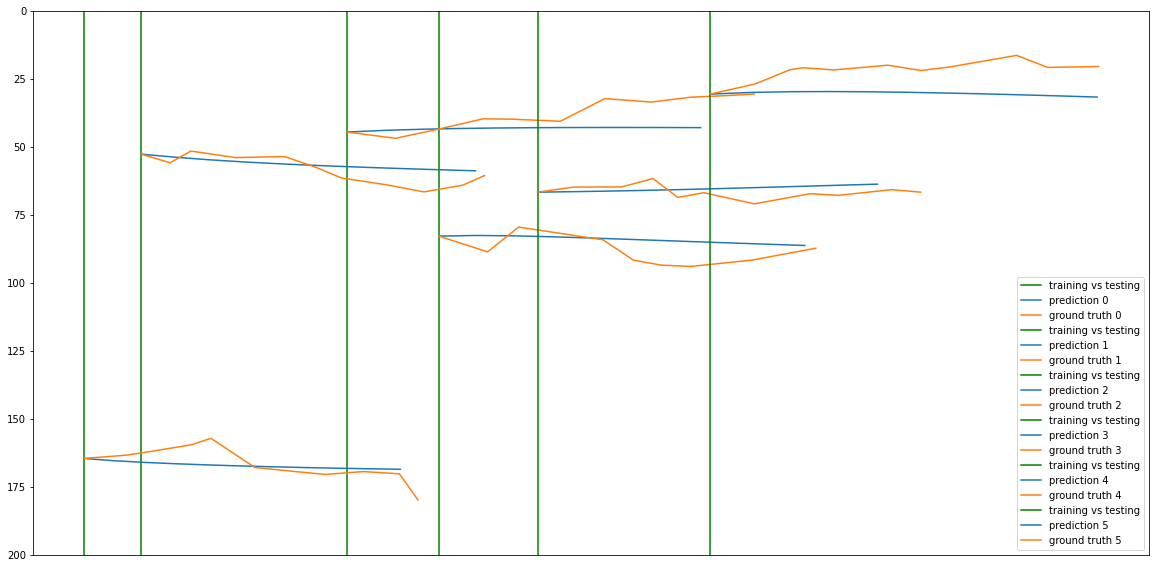

In [70]:
plot(model, 100, [0, 1, 2, 3, 4, 5])

## What is the max k?

In [ ]:
for k in range (2, 100):
    print('**************************************\n')
    print('                k = ' + str(k) + '\n')
    print('**************************************')
    df = preprocess(frames, k)
    X_train, y_train, X_test, y_test = split(df, 0.2)
    get_succ_pred()

**************************************

                k = 2

**************************************
The model performance for y_1 -> y_2
--------------------------------------
RMSE is 5.4009378735216815
R2 score is 0.967277435693219


**************************************

                k = 3

**************************************
The model performance for y_1 -> y_2
--------------------------------------
RMSE is 5.383127770156618
R2 score is 0.9675494492271869


The model performance for y_2 -> y_3
--------------------------------------
RMSE is 6.450901175802388
R2 score is 0.9520885763049262


**************************************

                k = 4

**************************************
The model performance for y_1 -> y_2
--------------------------------------
RMSE is 5.364437360837671
R2 score is 0.9678060732723265


The model performance for y_2 -> y_3
--------------------------------------
RMSE is 6.426728480197345
R2 score is 0.9525266400633347


The model performan